In [1]:
import os
import glob
import numpy as np
import pandas as pd
import re

import mne
from fooof import FOOOF, FOOOFGroup
from fooof.core.funcs import lorentzian_function, expo_function, expo_nk_function

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_53624/379626349.py:8: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF, FOOOFGroup


# Data Wrangling

In [2]:
df_localization = pd.read_csv('/Volumes/Nexus/Users/zouj/sEEG_data/electrode-localizations.tsv', delimiter='\t')\
    [['Subject', 'label', 'electrode', 'is_thalamic', 'is_cortical']]

In [3]:
spectra_file_names = glob.glob('/Volumes/Nexus/Users/zouj/sEEG_data/spectra/*')
ch_dict = {}
for spectra_file in spectra_file_names:
    subject_pattern = r'EM\d{4}'
    subject = re.findall(subject_pattern, os.path.basename(spectra_file))[0]
    if subject not in ch_dict:
        spectra = mne.time_frequency.read_spectrum(spectra_file)
        ch_dict[subject] = spectra.ch_names

In [4]:
file_basenames = [os.path.basename(file_path) 
                  for file_path in glob.glob('/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof*150*/fits/*')]

# Regularization Weight Comparison

## Individual Examples

### 1002

In [50]:
glob.glob('/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof*200*bw1*/fits/*1002*')

['/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits/EM1002_ses-EMU_task-resting_run-1_1-fooof_group.json',
 '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits/EM1002_ses-EMU_task-resting_run-1_2-fooof_group.json',
 '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r0_bw1_pw25/fits/EM1002_ses-EMU_task-resting_run-1_1-fooof_group.json',
 '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r0_bw1_pw25/fits/EM1002_ses-EMU_task-resting_run-1_2-fooof_group.json']

In [51]:
file_1002 = 'EM1002_ses-EMU_task-resting_run-1_1-fooof_group.json'
fg_r4_1002 = FOOOFGroup()
fg_r4_1002.load(file_1002, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits')

fg_r0_1002 = FOOOFGroup()
fg_r0_1002.load(file_1002, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r0_bw1_pw25/fits')


0
0


In [59]:
ch_dict['EM1002'].index('RCM1'), ch_dict['EM1002'].index('RCM13')

(16, 28)

0
0
0
0
0


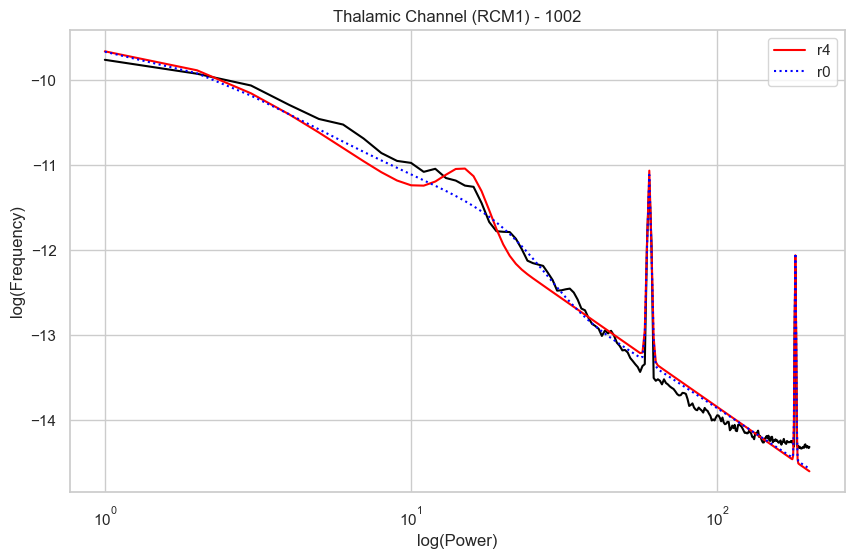

In [77]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1002.get_fooof(16).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_r4_1002.get_fooof(16).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1002.get_fooof(16).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='r4')
# sns.lineplot(x=np.linspace(1, 200, 200), 
#              y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
#              color ='red', linestyle='dashed', label='r4 aperiodic')

offset, log_knee, exp = fg_r0_1002.get_fooof(16).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r0_1002.get_fooof(16).fooofed_spectrum_,
             color = 'blue', linestyle='dotted', label='r0')
# sns.lineplot(x=np.linspace(1, 200, 200), 
#              y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
#              color ='blue', linestyle='dashed', label='r0 aperiodic')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Thalamic Channel (RCM1) - 1002')
plt.show()

0
0
0
0
0


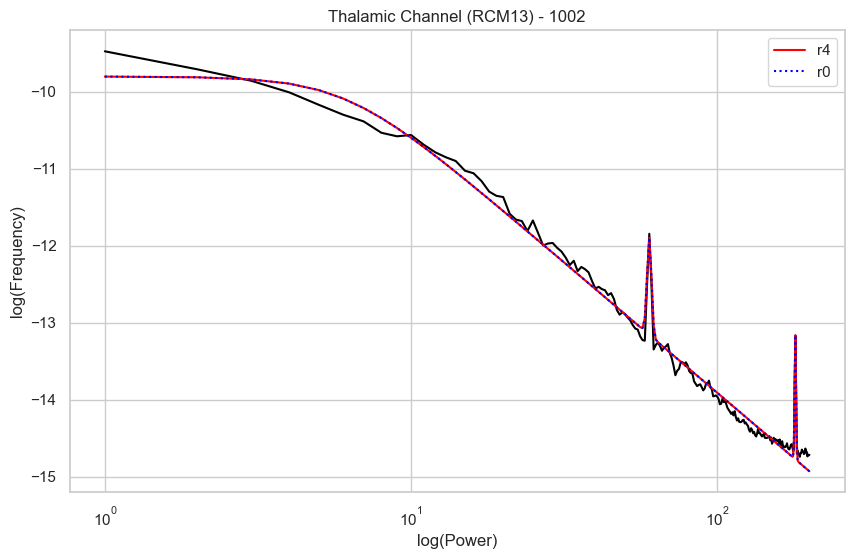

In [76]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1002.get_fooof(28).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_r4_1002.get_fooof(28).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1002.get_fooof(28).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='r4')
# sns.lineplot(x=np.linspace(1, 200, 200), 
#              y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
#              color ='red', linestyle='dashed', label='r4 aperiodic')

offset, log_knee, exp = fg_r0_1002.get_fooof(28).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r0_1002.get_fooof(28).fooofed_spectrum_,
             color = 'blue', linestyle='dotted', label='r0')
# sns.lineplot(x=np.linspace(1, 200, 200), 
#              y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
#              color ='blue', linestyle='dashed', label='r0 aperiodic')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Thalamic Channel (RCM13) - 1002')
plt.show()

### 1029

In [62]:
file_1029 = 'sub-EM1029_ses-EMU_task-resting_run-01-fooof_group.json'
fg_r4_1029 = FOOOFGroup()
fg_r4_1029.load(file_1029, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits')

fg_r0_1029 = FOOOFGroup()
fg_r0_1029.load(file_1029, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r0_bw1_pw25/fits')


0
0


0
0
0
0
0


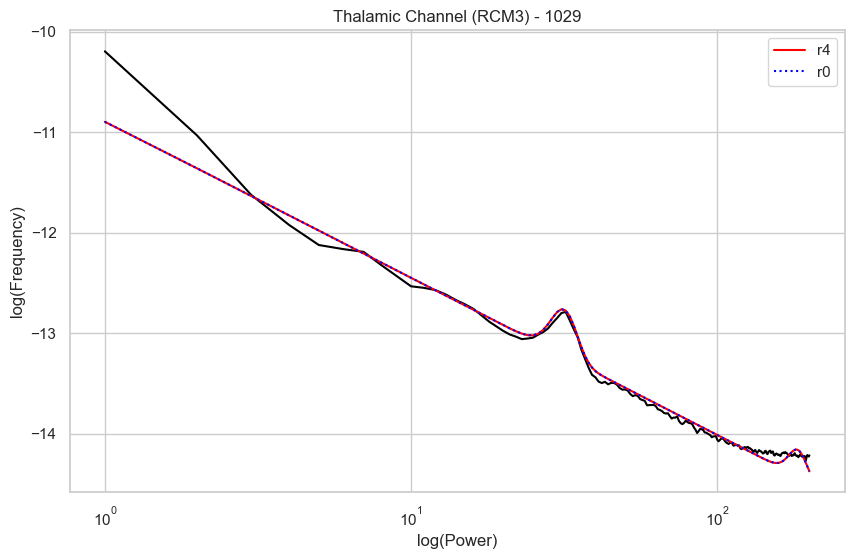

In [75]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1029.get_fooof(26).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_r4_1029.get_fooof(26).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1029.get_fooof(26).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='r4')
# sns.lineplot(x=np.linspace(1, 200, 200), 
#              y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
#              color ='red', linestyle='dashed', label='r4 aperiodic')

offset, log_knee, exp = fg_r0_1029.get_fooof(26).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r0_1029.get_fooof(26).fooofed_spectrum_,
             color = 'blue', linestyle='dotted', label='r0')
# sns.lineplot(x=np.linspace(1, 200, 200), 
#              y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
#              color ='blue', linestyle='dashed', label='r0 aperiodic')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Thalamic Channel (RCM3) - 1029')
plt.show()

0
0
0
0
0


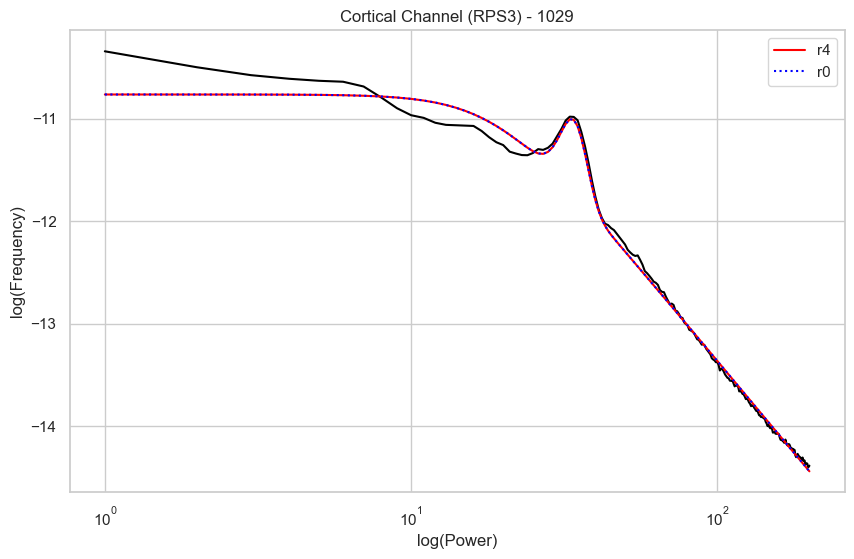

In [74]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1029.get_fooof(34).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_r4_1029.get_fooof(34).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1029.get_fooof(34).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='r4')
# sns.lineplot(x=np.linspace(1, 200, 200), 
#              y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
#              color ='red', linestyle='dashed', label='r4 aperiodic')

offset, log_knee, exp = fg_r0_1029.get_fooof(34).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r0_1029.get_fooof(34).fooofed_spectrum_,
             color = 'blue', linestyle='dotted', label='r0')
# sns.lineplot(x=np.linspace(1, 200, 200), 
#              y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
#              color ='blue', linestyle='dashed', label='r0 aperiodic')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Cortical Channel (RPS3) - 1029')
plt.show()

#### Regularization term importance

In [78]:
ch_dict['EM1002'].index('LCM3'), ch_dict['EM1002'].index('LCM5')

(2, 4)

0
0
0
0
0


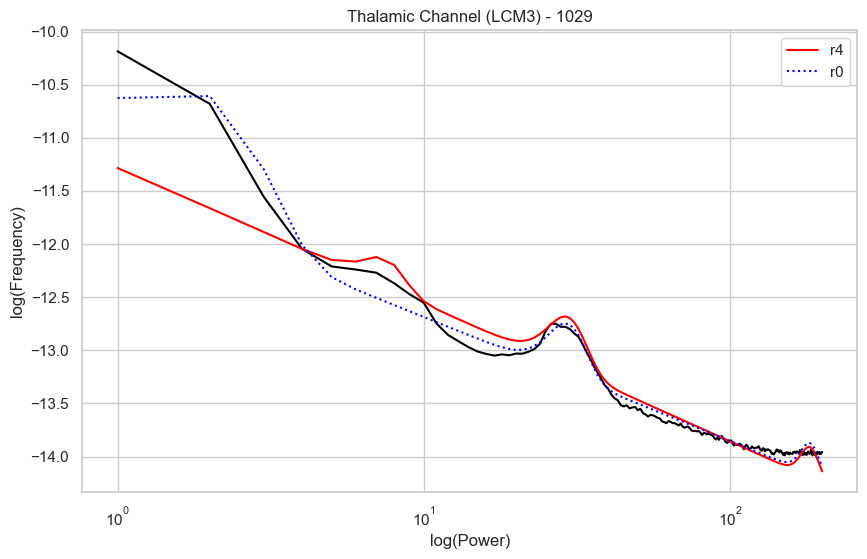

In [79]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1029.get_fooof(2).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_r4_1029.get_fooof(2).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1029.get_fooof(2).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='r4')

offset, log_knee, exp = fg_r0_1029.get_fooof(26).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r0_1029.get_fooof(2).fooofed_spectrum_,
             color = 'blue', linestyle='dotted', label='r0')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Thalamic Channel (LCM3) - 1029')
plt.show()

0
0
0
0
0


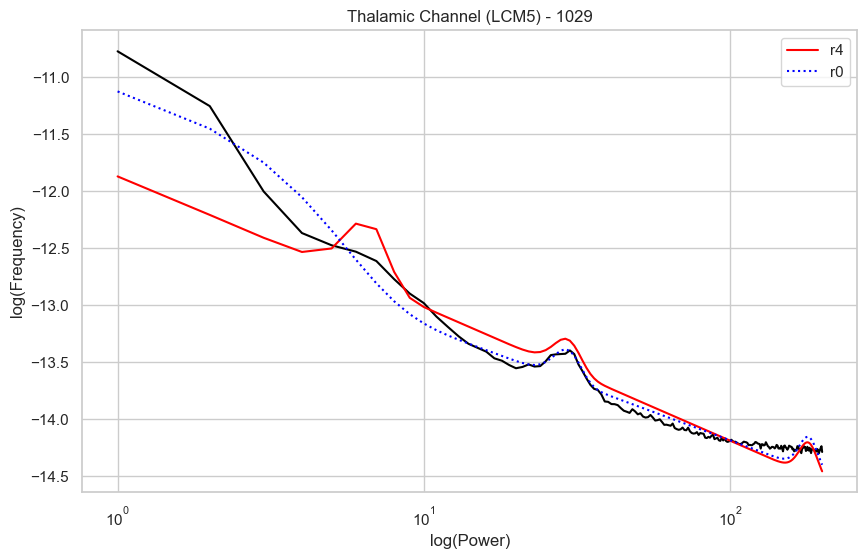

In [80]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1029.get_fooof(4).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_r4_1029.get_fooof(4).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1029.get_fooof(4).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='r4')

offset, log_knee, exp = fg_r0_1029.get_fooof(26).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r0_1029.get_fooof(4).fooofed_spectrum_,
             color = 'blue', linestyle='dotted', label='r0')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Thalamic Channel (LCM5) - 1029')
plt.show()

### 1066

In [68]:
file_1066 = 'sub-EM1066_ses-EMU_task-resting_run-01_ieeg-fooof_group.json'
fg_r4_1066 = FOOOFGroup()
fg_r4_1066.load(file_1066, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits')

fg_r0_1066 = FOOOFGroup()
fg_r0_1066.load(file_1066, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r0_bw1_pw25/fits')

0
0


0
0
0
0
0


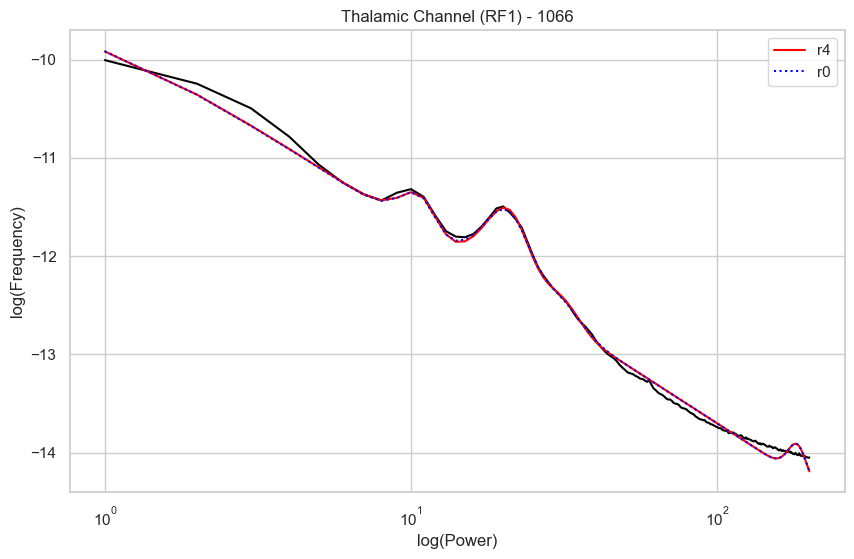

In [73]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1066.get_fooof(16).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_r4_1066.get_fooof(16).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1066.get_fooof(16).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='r4')
# sns.lineplot(x=np.linspace(1, 200, 200), 
#              y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
#              color ='red', linestyle='dashed', label='r4 aperiodic')

offset, log_knee, exp = fg_r0_1066.get_fooof(16).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r0_1066.get_fooof(16).fooofed_spectrum_,
             color = 'blue', linestyle='dotted', label='r0')
# sns.lineplot(x=np.linspace(1, 200, 200), 
#              y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
#              color ='blue', linestyle='dashed', label='r0 aperiodic')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Thalamic Channel (RF1) - 1066')
plt.show()

0
0
0
0
0


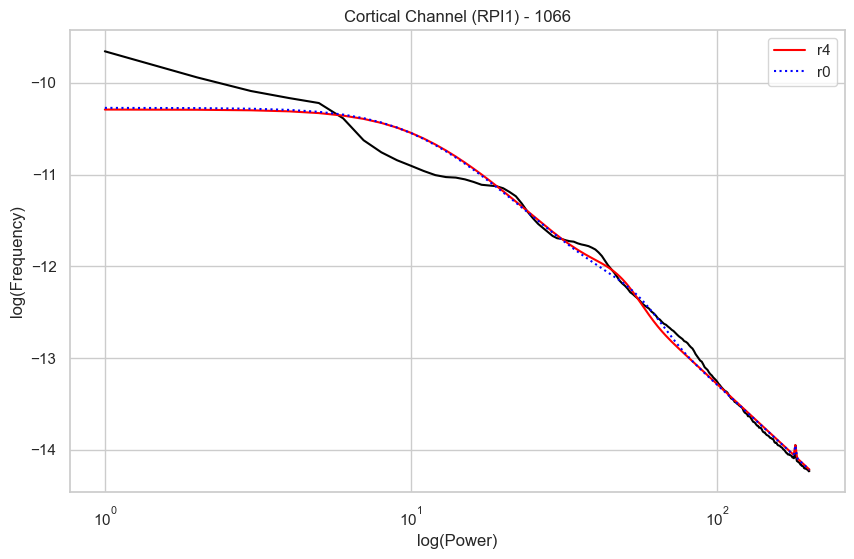

In [72]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1066.get_fooof(24).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_r4_1066.get_fooof(24).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r4_1066.get_fooof(24).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='r4')
# sns.lineplot(x=np.linspace(1, 200, 200), 
#              y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
#              color ='red', linestyle='dashed', label='r4 aperiodic')

offset, log_knee, exp = fg_r0_1066.get_fooof(24).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_r0_1066.get_fooof(24).fooofed_spectrum_,
             color = 'blue', linestyle='dotted', label='r0')
# sns.lineplot(x=np.linspace(1, 200, 200), 
#              y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
#              color ='blue', linestyle='dashed', label='r0 aperiodic')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Cortical Channel (RPI1) - 1066')
plt.show()

## Group Level Analysis

In [5]:
dir_list = ['/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits',
            '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r0_bw1_pw25/fits']

In [6]:
results_df_list = []
for dir in dir_list:
    dir_name = os.path.basename(os.path.dirname(dir))
    for file in file_basenames:
        subject_pattern = r'EM\d{4}'
        subject = re.findall(subject_pattern, file)[0]

        run_pattern = r'run-\d[^a-zA-Z]*'
        run = re.findall(run_pattern, file)[0][:-1]

        fg = FOOOFGroup()
        fg.load(file, dir)

        df = pd.DataFrame(np.array([fooof.aperiodic_params for fooof in fg.group_results]), 
                  columns=['offset', 'log_knee', 'exponent'])
        
        df.insert(0, 'fitting_params', dir_name)
        df.insert(1, 'Subject', subject)
        df.insert(2, 'run', run)
        df.insert(3, 'label', ch_dict[subject])

        df['r_squared'] = [fooof.r_squared for fooof in fg.group_results] 
        df['error'] = [fooof.error for fooof in fg.group_results] 

        print('adding data from', len(ch_dict[subject]), 'channels for', dir_name, subject, run)
        results_df_list.append(df)

0
adding data from 18 channels for fooof_1-200hz_r4_bw1_pw25 EM1021 run-01
0
adding data from 18 channels for fooof_1-200hz_r4_bw1_pw25 EM1021 run-02
0
adding data from 18 channels for fooof_1-200hz_r4_bw1_pw25 EM1021 run-03
0
adding data from 46 channels for fooof_1-200hz_r4_bw1_pw25 EM1023 run-02
0
adding data from 46 channels for fooof_1-200hz_r4_bw1_pw25 EM1023 run-01
0
adding data from 44 channels for fooof_1-200hz_r4_bw1_pw25 EM1029 run-01
0
adding data from 32 channels for fooof_1-200hz_r4_bw1_pw25 EM1002 run-1_1
0
adding data from 32 channels for fooof_1-200hz_r4_bw1_pw25 EM1002 run-1_2
0
adding data from 32 channels for fooof_1-200hz_r4_bw1_pw25 EM1035 run-1
0
adding data from 42 channels for fooof_1-200hz_r4_bw1_pw25 EM1061 run-01
0
adding data from 32 channels for fooof_1-200hz_r4_bw1_pw25 EM1063 run-01
0
adding data from 34 channels for fooof_1-200hz_r4_bw1_pw25 EM1066 run-01
0
adding data from 18 channels for fooof_1-200hz_r0_bw1_pw25 EM1021 run-01
0
adding data from 18 ch

In [7]:
df_results_reg_weight = pd.concat(results_df_list, ignore_index=True)
df_results_reg_weight.insert(1, 'reg weight', [params.split('_')[2] for params in df_results_reg_weight['fitting_params']])

In [10]:
df_results_reg_weight_median = df_results_reg_weight.drop(['fitting_params','run'], axis=1).\
        groupby(['reg weight', 'Subject', 'label']).\
        median( ).\
        reset_index()

<Axes: xlabel='reg weight', ylabel='r_squared'>

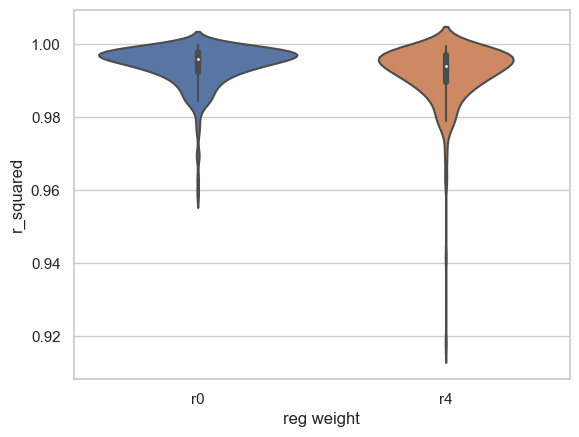

In [45]:
sns.violinplot(data=df_results_reg_weight_median, y="r_squared", x="reg weight")

<Axes: xlabel='reg weight', ylabel='error'>

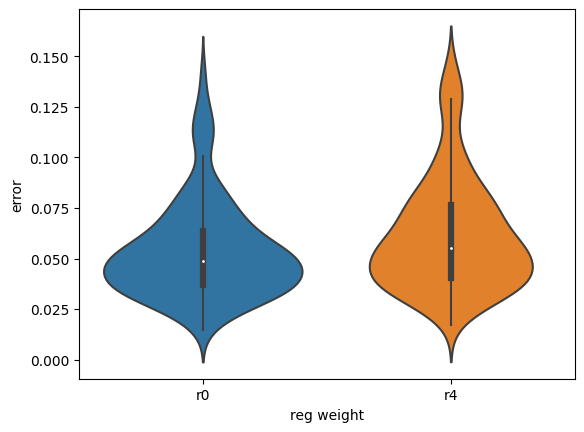

In [13]:
sns.violinplot(data=df_results_reg_weight_median, y="error", x="reg weight")

In [14]:
df_results_reg_weight_median_pivot = df_results_reg_weight_median.pivot(index=['Subject', 'label'], 
                        columns='reg weight')

/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_53624/3633548119.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


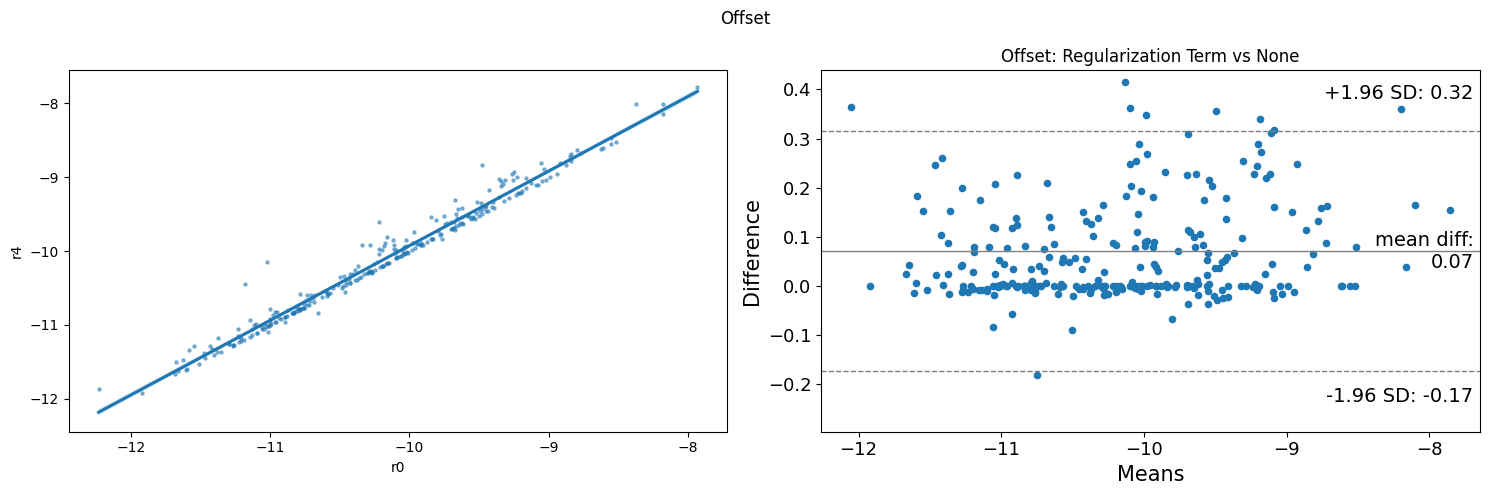

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x=df_results_reg_weight_median_pivot['offset']['r0'], 
            y=df_results_reg_weight_median_pivot['offset']['r4'],
            ax=axes[0],
            ci = 95, scatter_kws = {'s': 5, 'alpha': 0.5})

sm.graphics.mean_diff_plot(df_results_reg_weight_median_pivot['offset']['r4'], 
                           df_results_reg_weight_median_pivot['offset']['r0'], ax=axes[1])
axes[1].set_title('Offset: Regularization Term vs None')

plt.suptitle('Offset')
plt.tight_layout()
plt.show()

/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_53624/2828944515.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


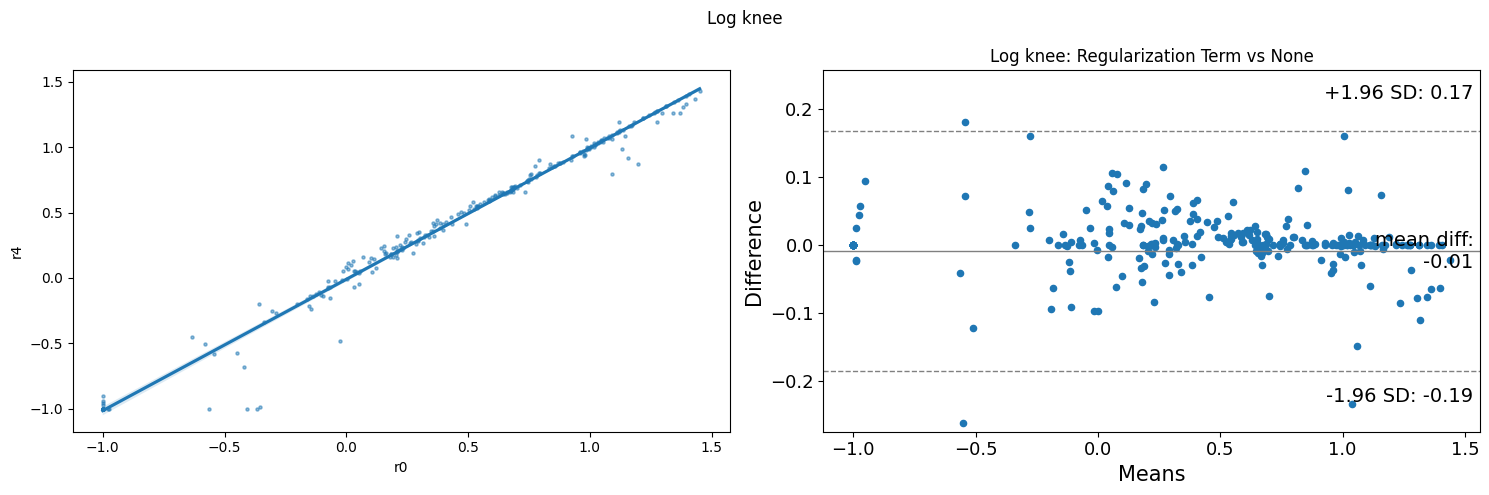

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x=df_results_reg_weight_median_pivot['log_knee']['r0'], 
            y=df_results_reg_weight_median_pivot['log_knee']['r4'],
            ax=axes[0],
            ci = 95, scatter_kws = {'s': 5, 'alpha': 0.5})

sm.graphics.mean_diff_plot(df_results_reg_weight_median_pivot['log_knee']['r4'], 
                           df_results_reg_weight_median_pivot['log_knee']['r0'], ax=axes[1])
axes[1].set_title('Log knee: Regularization Term vs None')

plt.suptitle('Log knee')
plt.tight_layout()
plt.show()

/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_53624/93891228.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


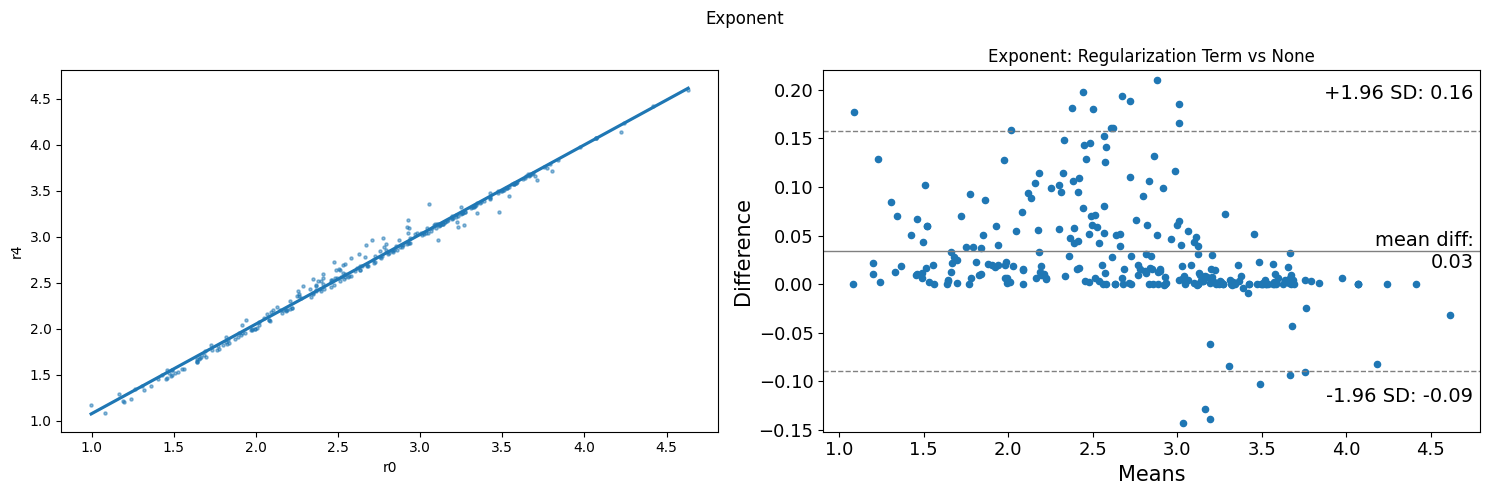

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x=df_results_reg_weight_median_pivot['exponent']['r0'], 
            y=df_results_reg_weight_median_pivot['exponent']['r4'],
            ax=axes[0],
            ci = 95, scatter_kws = {'s': 5, 'alpha': 0.5})

sm.graphics.mean_diff_plot(df_results_reg_weight_median_pivot['exponent']['r4'], 
                           df_results_reg_weight_median_pivot['exponent']['r0'], ax=axes[1])
axes[1].set_title('Exponent: Regularization Term vs None')

plt.suptitle('Exponent')
plt.tight_layout()
plt.show()

# Aperiodic Model Comparison

## Individual Examples

### 1002 RCM1 RCM13

In [48]:
glob.glob('/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof*200*/fits/*1002*')

['/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits/EM1002_ses-EMU_task-resting_run-1_1-fooof_group.json',
 '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits/EM1002_ses-EMU_task-resting_run-1_2-fooof_group.json',
 '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r0_bw1_pw25/fits/EM1002_ses-EMU_task-resting_run-1_1-fooof_group.json',
 '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r0_bw1_pw25/fits/EM1002_ses-EMU_task-resting_run-1_2-fooof_group.json']

In [49]:
file_1002 = 'EM1002_ses-EMU_task-resting_run-1_1-fooof_group.json'
fg_lorentzian_1002 = FOOOFGroup()
fg_lorentzian_1002.load(file_1002, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits')

fg_fixed_1002 = FOOOFGroup()
fg_fixed_1002.load(file_1002, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof-fixed_1-200hz_pw25/fits')

fg_knee_1002 = FOOOFGroup()
fg_knee_1002.load(file_1002, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof-knee_1-200hz_pw25/fits')

0
0


In [31]:
ch_dict['EM1002'].index('RCM1')

16

0
0
0
0
0


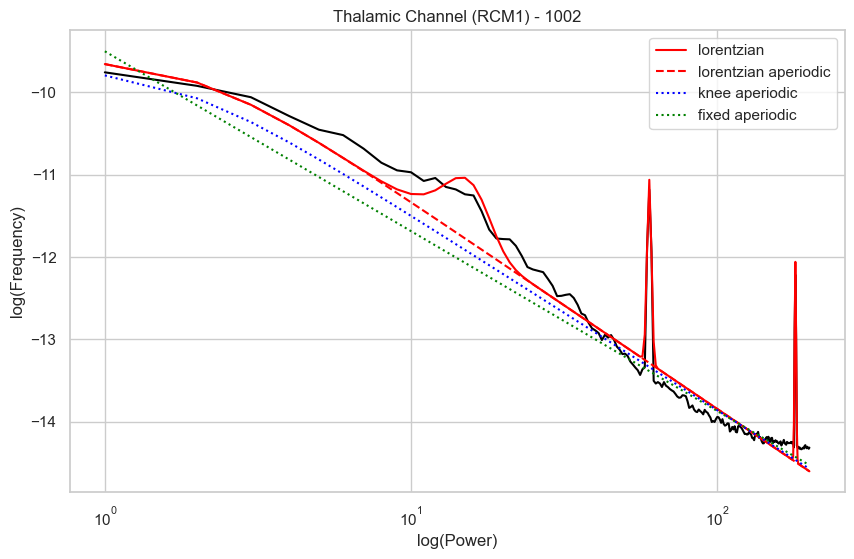

In [56]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1002.get_fooof(16).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_lorentzian_1002.get_fooof(16).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1002.get_fooof(16).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='lorentzian')
sns.lineplot(x=np.linspace(1, 200, 200), 
             y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
             color ='red', linestyle='dashed', label='lorentzian aperiodic')

offset, knee, exp = fg_knee_1002.get_fooof(16).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), 
             y=expo_function(np.linspace(1, 200, 200), offset, knee, exp),
             color ='blue', linestyle='dotted', label='knee aperiodic')

offset, exp = fg_fixed_1002.get_fooof(16).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200),
             y=expo_nk_function(np.linspace(1, 200, 200), offset, exp),
             color = 'green', linestyle='dotted', label='fixed aperiodic')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Thalamic Channel (RCM1) - 1002')
plt.show()

In [36]:
ch_dict['EM1002'].index('RCM13')

28

0
0
0
0
0


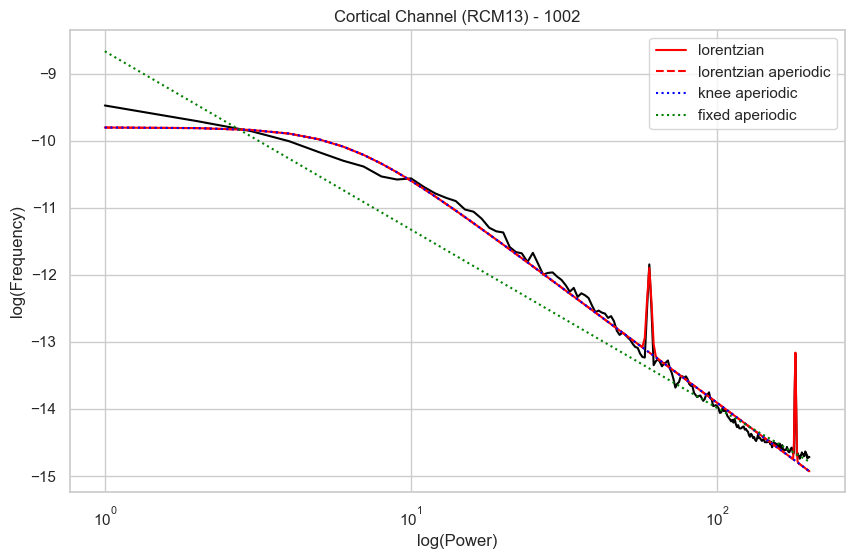

In [55]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1002.get_fooof(28).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_lorentzian_1002.get_fooof(28).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1002.get_fooof(28).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='lorentzian')
sns.lineplot(x=np.linspace(1, 200, 200), 
             y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
             color ='red', linestyle='dashed', label='lorentzian aperiodic')

offset, knee, exp = fg_knee_1002.get_fooof(28).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), 
             y=expo_function(np.linspace(1, 200, 200), offset, knee, exp),
             color ='blue', linestyle='dotted', label='knee aperiodic')

offset, exp = fg_fixed_1002.get_fooof(28).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200),
             y=expo_nk_function(np.linspace(1, 200, 200), offset, exp),
             color = 'green', linestyle='dotted', label='fixed aperiodic')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Cortical Channel (RCM13) - 1002')
plt.show()

### 1029 RCM3 RPS3

In [99]:
glob.glob('/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof*200*/fits/*1029*')

['/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits/sub-EM1029_ses-EMU_task-resting_run-01-fooof_group.json',
 '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof-fixed_1-200hz_pw25/fits/sub-EM1029_ses-EMU_task-resting_run-01-fooof_group.json',
 '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof-knee_1-200hz_pw25/fits/sub-EM1029_ses-EMU_task-resting_run-01-fooof_group.json',
 '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r0_bw1_pw25/fits/sub-EM1029_ses-EMU_task-resting_run-01-fooof_group.json']

In [18]:
file_1029 = 'sub-EM1029_ses-EMU_task-resting_run-01-fooof_group.json'
fg_lorentzian_1029 = FOOOFGroup()
fg_lorentzian_1029.load(file_1029, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits')

fg_fixed_1029 = FOOOFGroup()
fg_fixed_1029.load(file_1029, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof-fixed_1-200hz_pw25/fits')

fg_knee_1029 = FOOOFGroup()
fg_knee_1029.load(file_1029, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof-knee_1-200hz_pw25/fits')

0
0
0


In [19]:
ch_dict['EM1029'].index('RPS3')

34

0
0
0
0


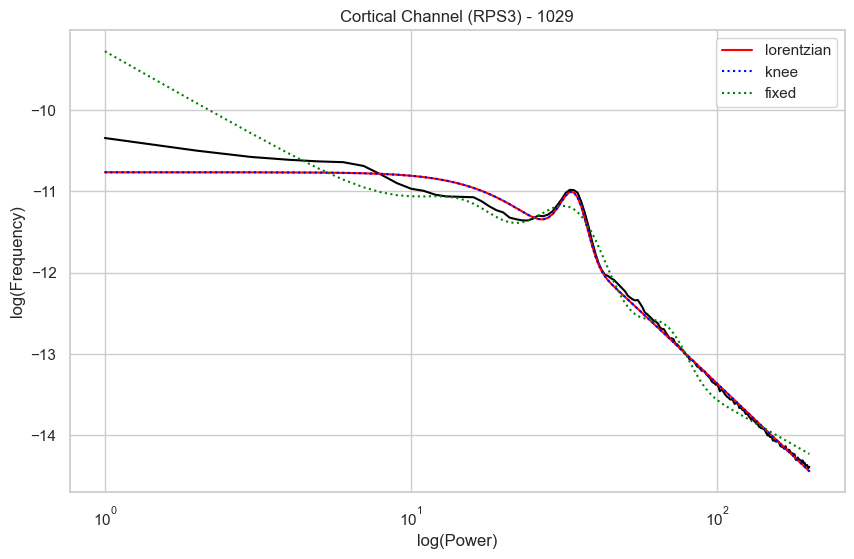

In [24]:
# Create the line plot with a logarithmic x-axis
plt.figure(figsize=(10, 6))  # Set the figure size

sns.lineplot(x=np.linspace(1, 200, 200), y=fg_knee_1029.get_fooof(34).power_spectrum, 
             color = 'black')
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1029.get_fooof(34).fooofed_spectrum_,
             color = 'red', linestyle='solid', label = 'lorentzian')
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_knee_1029.get_fooof(34).fooofed_spectrum_,
             color ='blue', linestyle='dotted', label = 'knee')
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_fixed_1029.get_fooof(34).fooofed_spectrum_,
             color = 'green', linestyle='dotted', label = 'fixed')

plt.xscale('log')  # Set the x-axis to be in logarithmic scale
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Cortical Channel (RPS3) - 1029')
plt.show()

0
0
0
0
0


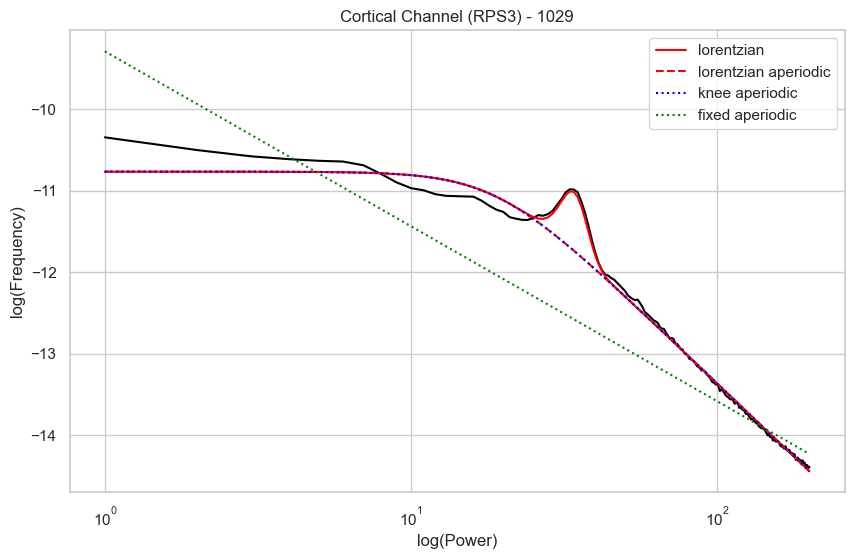

In [22]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1029.get_fooof(34).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_lorentzian_1029.get_fooof(34).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1029.get_fooof(34).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='lorentzian')
sns.lineplot(x=np.linspace(1, 200, 200), 
             y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
             color ='red', linestyle='dashed', label='lorentzian aperiodic')

offset, knee, exp = fg_knee_1029.get_fooof(34).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), 
             y=expo_function(np.linspace(1, 200, 200), offset, knee, exp),
             color ='blue', linestyle='dotted', label='knee aperiodic')

offset, exp = fg_fixed_1029.get_fooof(34).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200),
             y=expo_nk_function(np.linspace(1, 200, 200), offset, exp),
             color = 'green', linestyle='dotted', label='fixed aperiodic')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Cortical Channel (RPS3) - 1029')
plt.show()

In [104]:
ch_dict['EM1029'].index('RCM3')

26

0
0
0
0
0


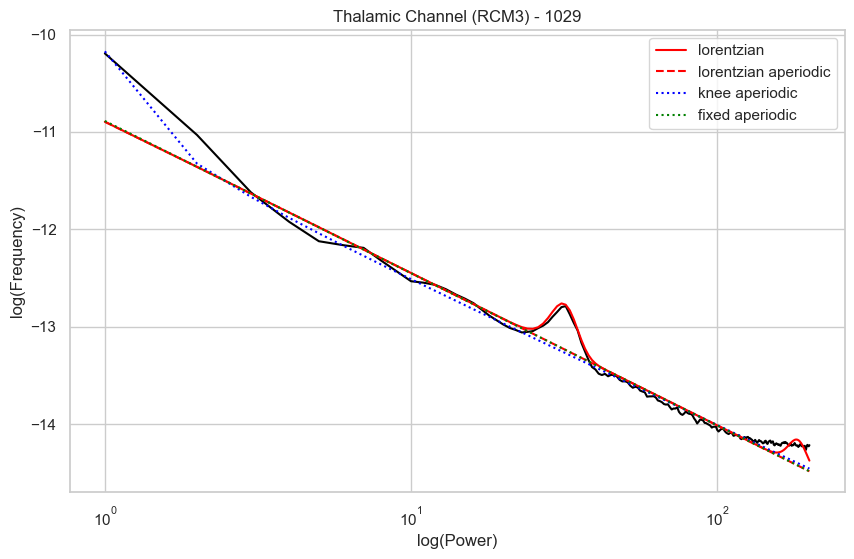

In [28]:
# Create the line plot with a logarithmic x-axis
#sns.set(style="whitegrid")  # Set the style for the plot
plt.figure(figsize=(10, 6))  # Set the figure size

sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1029.get_fooof(26).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_lorentzian_1029.get_fooof(26).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1029.get_fooof(26).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='lorentzian')
sns.lineplot(x=np.linspace(1, 200, 200), 
             y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
             color ='red', linestyle='dashed', label='lorentzian aperiodic')

offset, knee, exp = fg_knee_1029.get_fooof(26).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), 
             y=expo_function(np.linspace(1, 200, 200), offset, knee, exp),
             color ='blue', linestyle='dotted', label='knee aperiodic')

offset, exp = fg_fixed_1029.get_fooof(26).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200),
             y=expo_nk_function(np.linspace(1, 200, 200), offset, exp),
             color = 'green', linestyle='dotted', label='fixed aperiodic')

plt.xscale('log')  # Set the x-axis to be in logarithmic scale
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Thalamic Channel (RCM3) - 1029')
plt.show()

### 1066 RPI1 RF1

In [58]:
glob.glob('/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof*200*/fits/*1066*')

['/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits/sub-EM1066_ses-EMU_task-resting_run-01_ieeg-fooof_group.json',
 '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof-fixed_1-200hz_pw25/fits/sub-EM1066_ses-EMU_task-resting_run-01_ieeg-fooof_group.json',
 '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof-knee_1-200hz_pw25/fits/sub-EM1066_ses-EMU_task-resting_run-01_ieeg-fooof_group.json',
 '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r0_bw1_pw25/fits/sub-EM1066_ses-EMU_task-resting_run-01_ieeg-fooof_group.json']

In [39]:
file_1066 = 'sub-EM1066_ses-EMU_task-resting_run-01_ieeg-fooof_group.json'
fg_lorentzian_1066 = FOOOFGroup()
fg_lorentzian_1066.load(file_1066, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits')

fg_fixed_1066 = FOOOFGroup()
fg_fixed_1066.load(file_1066, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof-fixed_1-200hz_pw25/fits')

fg_knee_1066 = FOOOFGroup()
fg_knee_1066.load(file_1066, '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof-knee_1-200hz_pw25/fits')

0
0
0


In [77]:
ch_dict['EM1066'].index('RPI1')

24

0
0
0
0
0


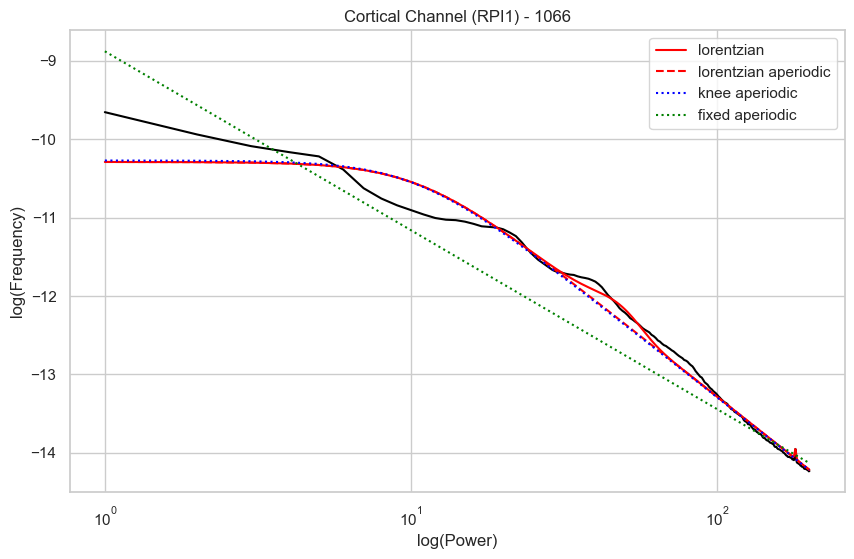

In [57]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1066.get_fooof(24).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_lorentzian_1066.get_fooof(24).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1066.get_fooof(24).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='lorentzian')
sns.lineplot(x=np.linspace(1, 200, 200), 
             y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
             color ='red', linestyle='dashed', label='lorentzian aperiodic')

offset, knee, exp = fg_knee_1066.get_fooof(24).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), 
             y=expo_function(np.linspace(1, 200, 200), offset, knee, exp),
             color ='blue', linestyle='dotted', label='knee aperiodic')

offset, exp = fg_fixed_1066.get_fooof(24).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200),
             y=expo_nk_function(np.linspace(1, 200, 200), offset, exp),
             color = 'green', linestyle='dotted', label='fixed aperiodic')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Cortical Channel (RPI1) - 1066')
plt.show()

In [69]:
ch_dict['EM1066'].index('RF1')

16

0
0
0
0
0


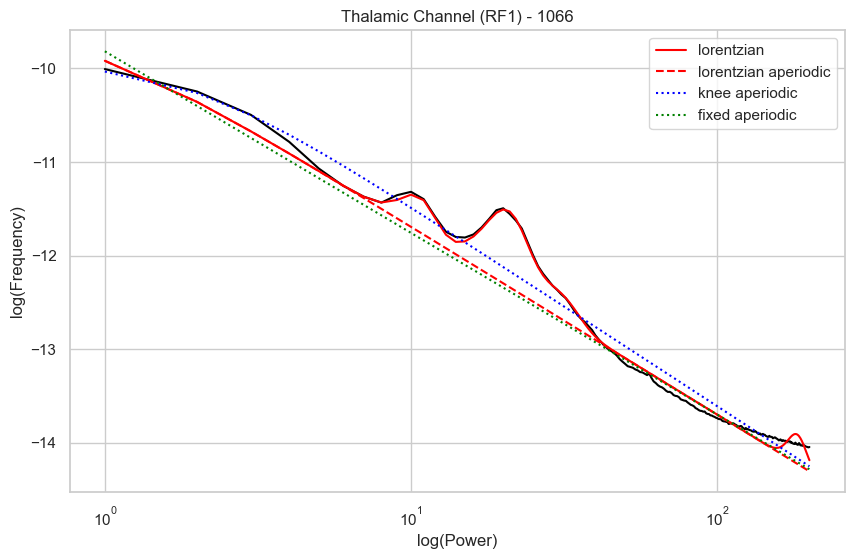

In [42]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the lineplot function from Seaborn
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1066.get_fooof(16).power_spectrum, 
             color = 'black')

offset, log_knee, exp = fg_lorentzian_1066.get_fooof(16).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), y=fg_lorentzian_1066.get_fooof(16).fooofed_spectrum_,
             color = 'red', linestyle='solid', label='lorentzian')
sns.lineplot(x=np.linspace(1, 200, 200), 
             y=lorentzian_function(np.linspace(1, 200, 200), offset, log_knee, exp),
             color ='red', linestyle='dashed', label='lorentzian aperiodic')

offset, knee, exp = fg_knee_1066.get_fooof(16).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200), 
             y=expo_function(np.linspace(1, 200, 200), offset, knee, exp),
             color ='blue', linestyle='dotted', label='knee aperiodic')

offset, exp = fg_fixed_1066.get_fooof(16).aperiodic_params_
sns.lineplot(x=np.linspace(1, 200, 200),
             y=expo_nk_function(np.linspace(1, 200, 200), offset, exp),
             color = 'green', linestyle='dotted', label='fixed aperiodic')

plt.xscale('log')  
plt.xlabel('log(Power)')
plt.ylabel('log(Frequency)')
plt.title('Thalamic Channel (RF1) - 1066')
plt.show()

## Group level
* r squared and error are similar
* not the best correlation with aperiodic parameters but that's not that unexpected

In [9]:
dir_list = ['/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof_1-200hz_r4_bw1_pw25/fits',
            '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof-fixed_1-200hz_pw25/fits',
            '/Volumes/Nexus/Users/zouj/sEEG_data/fooof_outputs/fooof-knee_1-200hz_pw25/fits']

In [11]:
results_df_list = []
for dir in dir_list:
    dir_name = os.path.basename(os.path.dirname(dir))
    for file in file_basenames:
        subject_pattern = r'EM\d{4}'
        subject = re.findall(subject_pattern, file)[0]

        run_pattern = r'run-\d[^a-zA-Z]*'
        run = re.findall(run_pattern, file)[0][:-1]

        fg = FOOOFGroup()
        fg.load(file, dir)

        df = pd.DataFrame(np.array([[fooof.aperiodic_params[0],  fooof.aperiodic_params[-1]]
                                    for fooof in fg.group_results]), 
                  columns=['offset', 'exponent'])
        
        df.insert(0, 'fitting_params', dir_name)
        df.insert(1, 'Subject', subject)
        df.insert(2, 'run', run)
        df.insert(3, 'label', ch_dict[subject])

        df['r_squared'] = [fooof.r_squared for fooof in fg.group_results] 
        df['error'] = [fooof.error for fooof in fg.group_results] 

        print('adding data from', len(ch_dict[subject]), 'channels for', dir_name, subject, run)
        results_df_list.append(df)

adding data from 18 channels for fooof_1-200hz_r4_bw1_pw25 EM1021 run-01
adding data from 18 channels for fooof_1-200hz_r4_bw1_pw25 EM1021 run-02
adding data from 18 channels for fooof_1-200hz_r4_bw1_pw25 EM1021 run-03
adding data from 46 channels for fooof_1-200hz_r4_bw1_pw25 EM1023 run-02
adding data from 46 channels for fooof_1-200hz_r4_bw1_pw25 EM1023 run-01
adding data from 44 channels for fooof_1-200hz_r4_bw1_pw25 EM1029 run-01
adding data from 32 channels for fooof_1-200hz_r4_bw1_pw25 EM1002 run-1_1
adding data from 32 channels for fooof_1-200hz_r4_bw1_pw25 EM1002 run-1_2
adding data from 32 channels for fooof_1-200hz_r4_bw1_pw25 EM1035 run-1
adding data from 42 channels for fooof_1-200hz_r4_bw1_pw25 EM1061 run-01
adding data from 32 channels for fooof_1-200hz_r4_bw1_pw25 EM1063 run-01
adding data from 34 channels for fooof_1-200hz_r4_bw1_pw25 EM1066 run-01
adding data from 18 channels for fooof-fixed_1-200hz_pw25 EM1021 run-01
adding data from 18 channels for fooof-fixed_1-200h

In [17]:
df_results_ap_model_median = df_results_ap_model.drop(['fitting_params','run'], axis=1).\
        groupby(['model', 'Subject', 'label']).\
        median( ).\
        reset_index()

<Axes: xlabel='model', ylabel='r_squared'>

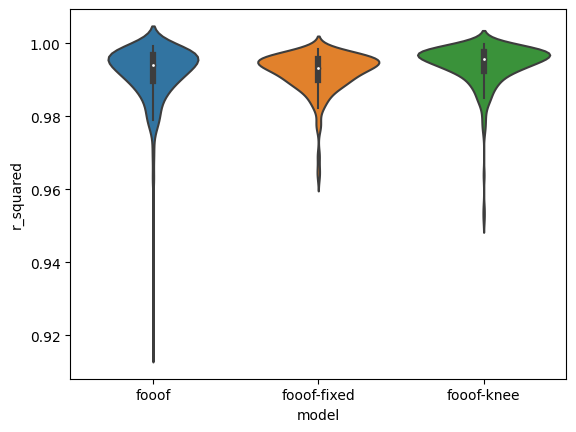

In [20]:
sns.violinplot(data=df_results_ap_model_median, y="r_squared", x="model")

<Axes: xlabel='model', ylabel='error'>

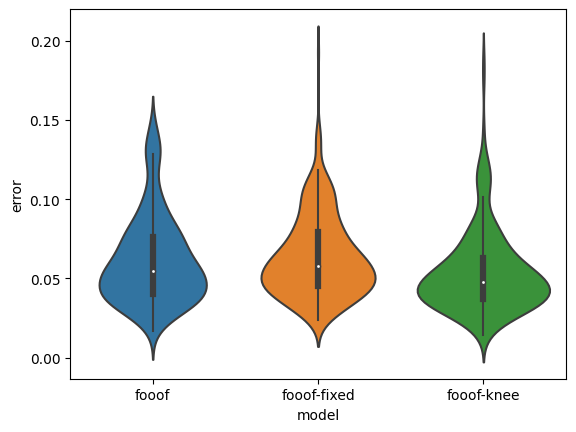

In [21]:
sns.violinplot(data=df_results_ap_model_median, y="error", x="model")

In [56]:
df_results_ap_model_median_pivot = df_results_ap_model_median.pivot(index=['Subject', 'label'], 
                        columns='model')

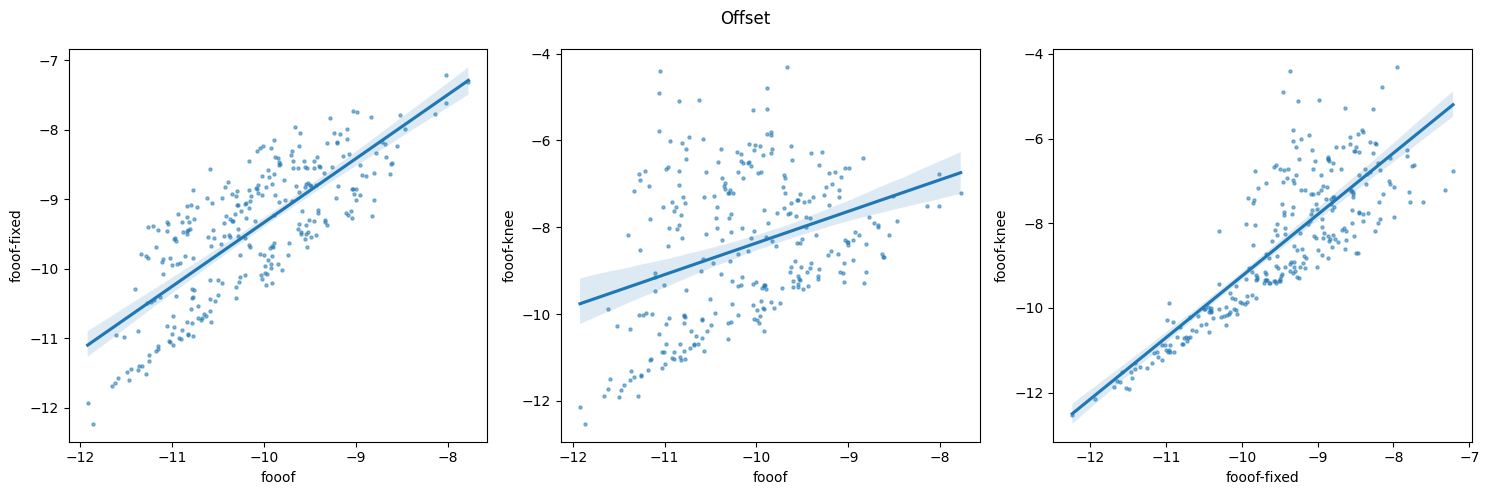

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(x=df_results_ap_model_median_pivot['offset']['fooof'], 
            y=df_results_ap_model_median_pivot['offset']['fooof-fixed'],
            ax=axes[0],
            ci = 95, scatter_kws = {'s': 5, 'alpha': 0.5})

sns.regplot(x=df_results_ap_model_median_pivot['offset']['fooof'], 
            y=df_results_ap_model_median_pivot['offset']['fooof-knee'],
              ax=axes[1],
              ci = 95, scatter_kws = {'s': 5, 'alpha': 0.5})

sns.regplot(x=df_results_ap_model_median_pivot['offset']['fooof-fixed'], 
            y=df_results_ap_model_median_pivot['offset']['fooof-knee'], 
            ax=axes[2],
            ci = 95, scatter_kws = {'s': 5, 'alpha': 0.5})

plt.suptitle('Offset')
plt.tight_layout()
plt.show()

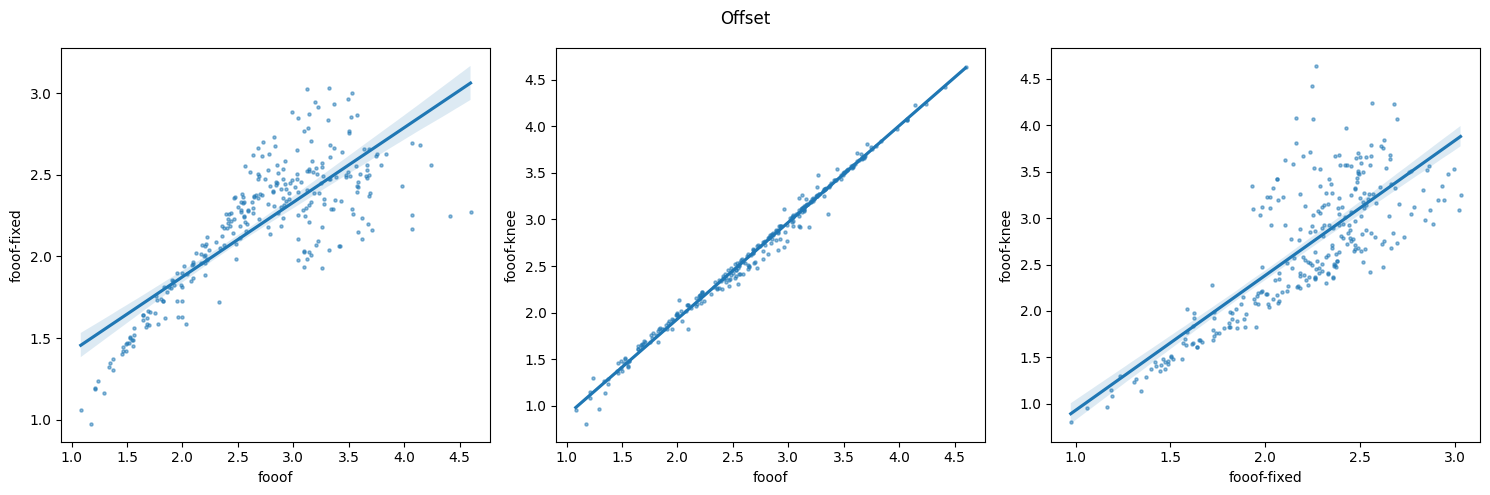

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(x=df_results_ap_model_median_pivot['exponent']['fooof'], 
            y=df_results_ap_model_median_pivot['exponent']['fooof-fixed'],
            ax=axes[0],
            ci = 95, scatter_kws = {'s': 5, 'alpha': 0.5})

sns.regplot(x=df_results_ap_model_median_pivot['exponent']['fooof'], 
            y=df_results_ap_model_median_pivot['exponent']['fooof-knee'],
              ax=axes[1],
              ci = 95, scatter_kws = {'s': 5, 'alpha': 0.5})

sns.regplot(x=df_results_ap_model_median_pivot['exponent']['fooof-fixed'], 
            y=df_results_ap_model_median_pivot['exponent']['fooof-knee'], 
            ax=axes[2],
            ci = 95, scatter_kws = {'s': 5, 'alpha': 0.5})

plt.suptitle('Offset')
plt.tight_layout()
plt.show()